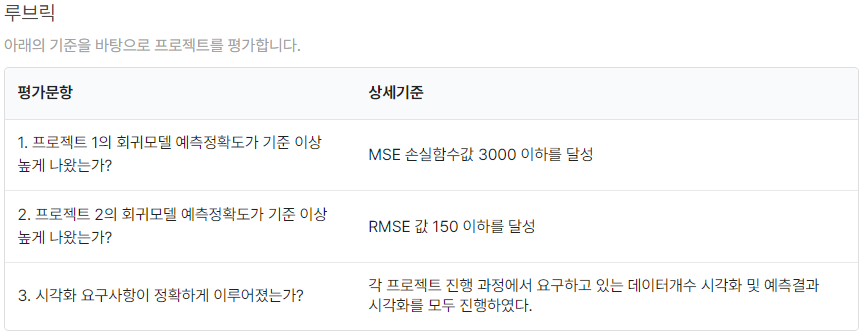

---

---

# 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

---

### 1. 데이터 가져오기
- sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
- diabetes의 data를 df_X에, target을 df_y에 저장해주세요.

In [1]:
# 앞으로 필요한 라이브러리들을 미리 호출

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from sklearn.datasets import load_diabetes        # 사이킷런(scikit-learn)라이브러리의 dataset(diabetes)을 import
from sklearn.model_selection import train_test_split # train / test 분리를 위한 메소드를 import

diabetes = load_diabetes()                         # 데이터셋을 변수에 할당
print(dir(diabetes))                               # diabetes의 요소들 확인

['DESCR', 'data', 'data_filename', 'data_module', 'feature_names', 'frame', 'target', 'target_filename']


In [3]:
df_X = diabetes.data           # data를 df_X에 저장
df_y = diabetes.target         # target을 df_y에 저장

---

### 2. 모델에 입력할 데이터 X 준비하기
- df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [4]:
X = np.array(df_X)
type(X)                    # np array임을 확인

numpy.ndarray

---

### 3. 모델에 예측할 데이터 y 준비하기
- df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [5]:
y = np.array(df_y)
type(y)                    # np array임을 확인

numpy.ndarray

---

### 4. train 데이터와 test 데이터로 분리하기
- X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=32)

---

### 5. 모델 준비하기
- 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
- 모델 함수를 구현해주세요.

#### MLS said :
1. 모델 = '기울기'가 있고 'y절편'이 있는 일차 함수이며
2. 앞으로, 기울기 = w / y절편 = b 라고 하기로 한다.

In [7]:
W = np.random.rand(10)
                        # weight x10
b = np.random.rand()
                        # bias x1

In [8]:
# model 함수 정의
# reference - LMS
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions +=X[:, i] * W[i]
    predictions += b
    return predictions

---

### 6. 손실함수 loss 정의하기
- 손실함수를 MSE 함수로 정의해주세요.

In [9]:
# MSE 함수 정의
# reference - LMS
def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

# loss 함수 정의
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L


In [10]:
loss_value = loss(X, W, b, y)

loss_value

28856.881205369595

---

### 7. 기울기를 구하는 gradient 함수 구현하기
- 기울기를 계산하는 gradient 함수를 구현해주세요.

In [11]:
def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [12]:
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [ -60.55687307  -13.8335924  -189.58407574 -142.63357487  -68.35508829
  -56.13365811  127.75867147 -139.14620728 -182.88607474 -123.59873999]
db: -302.89432483921706


---

### 8. 하이퍼 파라미터인 학습률 설정하기
- 학습률, learning rate 를 설정해주세요
- 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

In [13]:
# 학습률, learning rate를 설정
LEARNING_RATE = 0.0001

In [14]:
# gradient를 구하고, W와 b를 업데이트하고, 손실함수를 기록
# reference - LMS

losses = []

for i in range(1, 1000):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 29385.8435
Iteration 20 : Loss 29290.0103
Iteration 30 : Loss 29194.5518
Iteration 40 : Loss 29099.4665
Iteration 50 : Loss 29004.7529
Iteration 60 : Loss 28910.4095
Iteration 70 : Loss 28816.4349
Iteration 80 : Loss 28722.8276
Iteration 90 : Loss 28629.5861
Iteration 100 : Loss 28536.7091
Iteration 110 : Loss 28444.1949
Iteration 120 : Loss 28352.0423
Iteration 130 : Loss 28260.2497
Iteration 140 : Loss 28168.8158
Iteration 150 : Loss 28077.7391
Iteration 160 : Loss 27987.0182
Iteration 170 : Loss 27896.6516
Iteration 180 : Loss 27806.6381
Iteration 190 : Loss 27716.9761
Iteration 200 : Loss 27627.6642
Iteration 210 : Loss 27538.7012
Iteration 220 : Loss 27450.0856
Iteration 230 : Loss 27361.8160
Iteration 240 : Loss 27273.8910
Iteration 250 : Loss 27186.3094
Iteration 260 : Loss 27099.0696
Iteration 270 : Loss 27012.1704
Iteration 280 : Loss 26925.6104
Iteration 290 : Loss 26839.3883
Iteration 300 : Loss 26753.5027
Iteration 310 : Loss 26667.9523
Iteration 320 : L

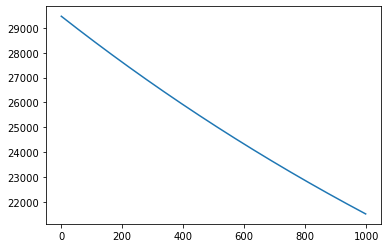

In [15]:
# loss down 양상을 그래프로 확인

plt.plot(losses)
plt.show()

In [16]:
# 학습률을 바꿔 다시 시도 *100
LEARNING_RATE = 0.01

losses = []

for i in range(1, 1000):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))



Iteration 10 : Loss 16057.7229
Iteration 20 : Loss 12363.6771
Iteration 30 : Loss 9848.5218
Iteration 40 : Loss 8125.0834
Iteration 50 : Loss 6934.3997
Iteration 60 : Loss 6103.1463
Iteration 70 : Loss 5515.2132
Iteration 80 : Loss 5092.7273
Iteration 90 : Loss 4783.3805
Iteration 100 : Loss 4551.9665
Iteration 110 : Loss 4374.7274
Iteration 120 : Loss 4235.5766
Iteration 130 : Loss 4123.5741
Iteration 140 : Loss 4031.2385
Iteration 150 : Loss 3953.4171
Iteration 160 : Loss 3886.5299
Iteration 170 : Loss 3828.0624
Iteration 180 : Loss 3776.2255
Iteration 190 : Loss 3729.7267
Iteration 200 : Loss 3687.6159
Iteration 210 : Loss 3649.1810
Iteration 220 : Loss 3613.8779
Iteration 230 : Loss 3581.2816
Iteration 240 : Loss 3551.0534
Iteration 250 : Loss 3522.9185
Iteration 260 : Loss 3496.6494
Iteration 270 : Loss 3472.0551
Iteration 280 : Loss 3448.9731
Iteration 290 : Loss 3427.2634
Iteration 300 : Loss 3406.8040
Iteration 310 : Loss 3387.4884
Iteration 320 : Loss 3369.2223
Iteration 330 :

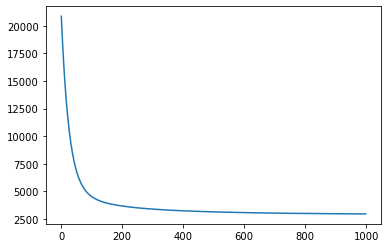

In [17]:
plt.plot(losses)
plt.show()

In [18]:
# 다양한 학습률로 시도 *100
LEARNING_RATE = 1

losses = []

for i in range(1, 1000):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 2923.8423
Iteration 20 : Loss 2920.3599
Iteration 30 : Loss 2919.3543
Iteration 40 : Loss 2918.6355
Iteration 50 : Loss 2917.9832
Iteration 60 : Loss 2917.3644
Iteration 70 : Loss 2916.7715
Iteration 80 : Loss 2916.2013
Iteration 90 : Loss 2915.6517
Iteration 100 : Loss 2915.1210
Iteration 110 : Loss 2914.6080
Iteration 120 : Loss 2914.1113
Iteration 130 : Loss 2913.6302
Iteration 140 : Loss 2913.1638
Iteration 150 : Loss 2912.7114
Iteration 160 : Loss 2912.2724
Iteration 170 : Loss 2911.8462
Iteration 180 : Loss 2911.4323
Iteration 190 : Loss 2911.0303
Iteration 200 : Loss 2910.6398
Iteration 210 : Loss 2910.2604
Iteration 220 : Loss 2909.8916
Iteration 230 : Loss 2909.5333
Iteration 240 : Loss 2909.1851
Iteration 250 : Loss 2908.8466
Iteration 260 : Loss 2908.5176
Iteration 270 : Loss 2908.1978
Iteration 280 : Loss 2907.8870
Iteration 290 : Loss 2907.5848
Iteration 300 : Loss 2907.2911
Iteration 310 : Loss 2907.0056
Iteration 320 : Loss 2906.7280
Iteration 330 : L

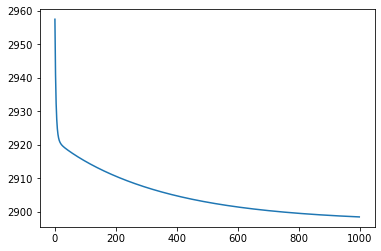

In [19]:
plt.plot(losses)
plt.show()

현재 진행중인 프로젝트 케이스에서는 학습률 값이 높을 수록 loss 값이 낮은 값에 수렴하는 것으로 보인다.

---

### 9. 모델 학습하기
- 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
- loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
- 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

→ 위 과정에서 진행 완료

---

### 10. test 데이터에 대한 성능 확인하기
- test 데이터에 대한 성능을 확인해주세요.

In [20]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2786.7055958810793

loss값이 초기 29000에 근사한 값에서,
학습률을 조정함으로써 2800 이하까지 많이 적어졌음을 알 수 있다.  
✅루브릭 평가 기준1 - MSE 3000 이하 달성

---

### 11. 정답 데이터와 예측한 데이터 시각화하기
- x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.

In [21]:
diabetes.feature_names    # 확인 할 데이터 분류

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

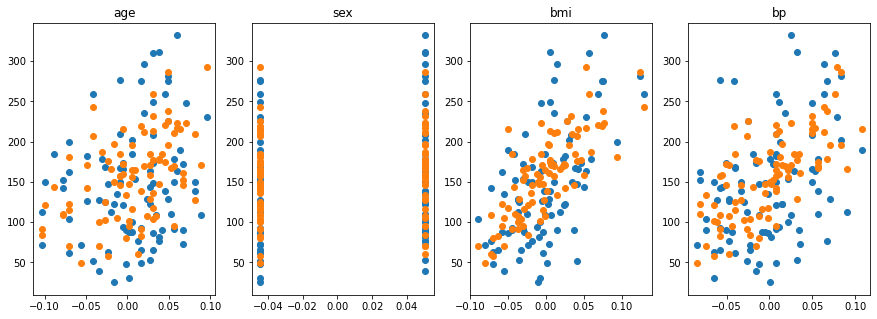

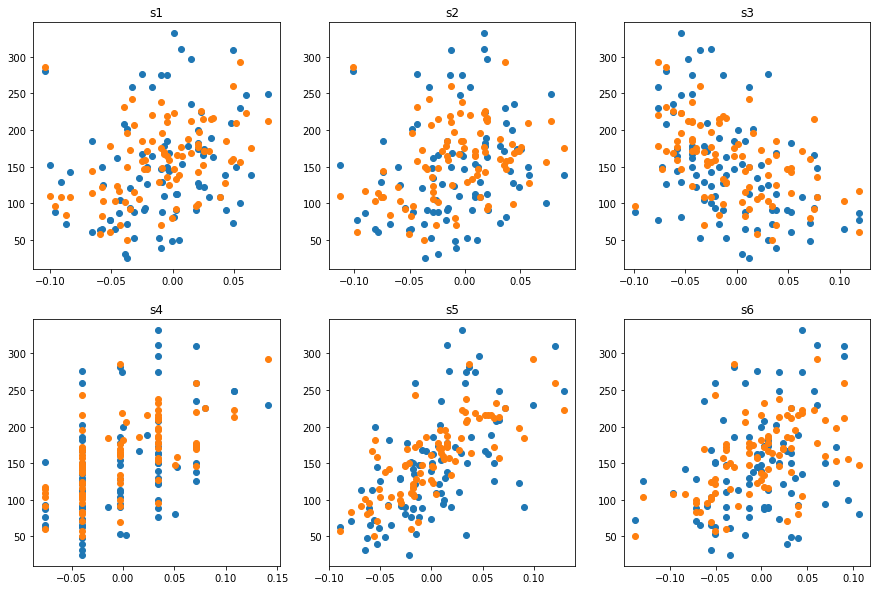

In [22]:
# matplotlib을 이용한 데이터 시각화

plt.figure(figsize=(15,5))

plt.subplot(141)
plt.title("age")
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)

plt.subplot(142)
plt.title("sex")
plt.scatter(X_test[:, 1], y_test)
plt.scatter(X_test[:, 1], prediction)

plt.subplot(143)
plt.title("bmi")
plt.scatter(X_test[:, 2], y_test)
plt.scatter(X_test[:, 2], prediction)

plt.subplot(144)
plt.title("bp")
plt.scatter(X_test[:, 3], y_test)
plt.scatter(X_test[:, 3], prediction)
plt.show()


##############################################

plt.figure(figsize=(15,10))

plt.subplot(231)
plt.title("s1")
plt.scatter(X_test[:, 4], y_test)
plt.scatter(X_test[:, 4], prediction)

plt.subplot(232)
plt.title("s2")
plt.scatter(X_test[:, 5], y_test)
plt.scatter(X_test[:, 5], prediction)

plt.subplot(233)
plt.title("s3")
plt.scatter(X_test[:, 6], y_test)
plt.scatter(X_test[:, 6], prediction)

plt.subplot(234)
plt.title("s4")
plt.scatter(X_test[:, 7], y_test)
plt.scatter(X_test[:, 7], prediction)

plt.subplot(235)
plt.title("s5")
plt.scatter(X_test[:, 8], y_test)
plt.scatter(X_test[:, 8], prediction)

plt.subplot(236)
plt.title("s6")
plt.scatter(X_test[:, 9], y_test)
plt.scatter(X_test[:, 9], prediction)
plt.show()

✅루브릭 평가 기준3 - 데이터 갯수 시각화 및 예측 결과 시각화

---

---

# 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

---

### 1. 데이터 가져오기
- 터미널에서 ~/data/data/bike-sharing-demand 경로에 train.csv 데이터를 train 변수로 가져 옵니다.
- 여기에서 데이터를 상세히 확인할 수 있습니다.

### →
- LOCAL jupyter notebook 에서 진행
- 파일 경로 : ~/Exploration/02_Regression/data

In [23]:
# 앞으로 필요한 라이브러리들을 미리 호출

import seaborn as sns            # seaborn

import os
from os.path import join
                                  #외부 파일을 가져오기 위한 라이브러리 호출
    
from sklearn.model_selection import train_test_split
                                  # train / test 분리를 위한 메소드를 import
    
from sklearn.metrics import mean_squared_error
                                  # 평균제곱오차(MSE)사용을 위한 호출

In [24]:
# 1. 파일 위치를 변수에 할당
data_dir = os.getenv('USERPROFILE')+'/Exploration/02_Regression/data'

train_data_path = join(data_dir, 'train.csv')
test_data_path = join(data_dir, 'test.csv')

print(train_data_path)
print(test_data_path)

C:\Users\seojoon.DYNO/Exploration/02_Regression/data\train.csv
C:\Users\seojoon.DYNO/Exploration/02_Regression/data\test.csv


In [25]:
# 2. train과 test CSV를 각각의 변수에 저장
train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

# 3. 크기 확인
print('train data shape : {}'.format(train.shape))
print('test data shape : {}'.format(test.shape))

train data shape : (10886, 12)
test data shape : (6493, 9)


→ 데이터 양이 많고 각각 12개와 9개의 컬럼을 가지고 있다.

In [26]:
print(type(train))
print(train.columns)
print("")
print(type(test))
print(test.columns)

<class 'pandas.core.frame.DataFrame'>
Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')


→ train이 test보다 3개의 컬럼이 더 많다 : casual / registered / count → 이 3개의 컬럼이 target임을 알 수 있다.

---
### train data
---

In [27]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### ...

In [28]:
train.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


---
### test data
---

In [29]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


### ...

In [30]:
test.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981
6492,2012-12-31 23:00:00,1,0,1,1,10.66,13.635,65,8.9981


→ 이전의 3개의 컬럼 casual / registered / count의 관계는 casual + registered = count 임을 알 수 있다.

---

### 2. datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
- to_datetime 활용 : 링크 참조
- pandas datetime extract year month day 키워드로 검색해 보기

In [31]:
train['datetime'] = pd.to_datetime(train['datetime'], format='%Y-%m-%d %H:%M:%S')

In [32]:
t_sep = train.copy()
t_sep['datetime']=t_sep.datetime.apply(pd.to_datetime)
print((t_sep['datetime']))

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]


In [33]:
t_sep['year'] = t_sep.datetime.apply(lambda x:x.year)
t_sep.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011


In [34]:
t_sep['year'] = t_sep['datetime'].dt.year 
t_sep['month'] = t_sep['datetime'].dt.month
t_sep['day'] = t_sep['datetime'].dt.day
t_sep['hour'] = t_sep['datetime'].dt.hour
t_sep['minute'] = t_sep['datetime'].dt.minute
t_sep['second'] = t_sep['datetime'].dt.second

print(t_sep.columns)

print(t_sep.info())

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64

---

### 3. year, month, day, hour, minute, second 데이터 개수 시각화하기
- sns.countplot 활용해서 시각화하기
- subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기

<AxesSubplot:xlabel='second', ylabel='count'>

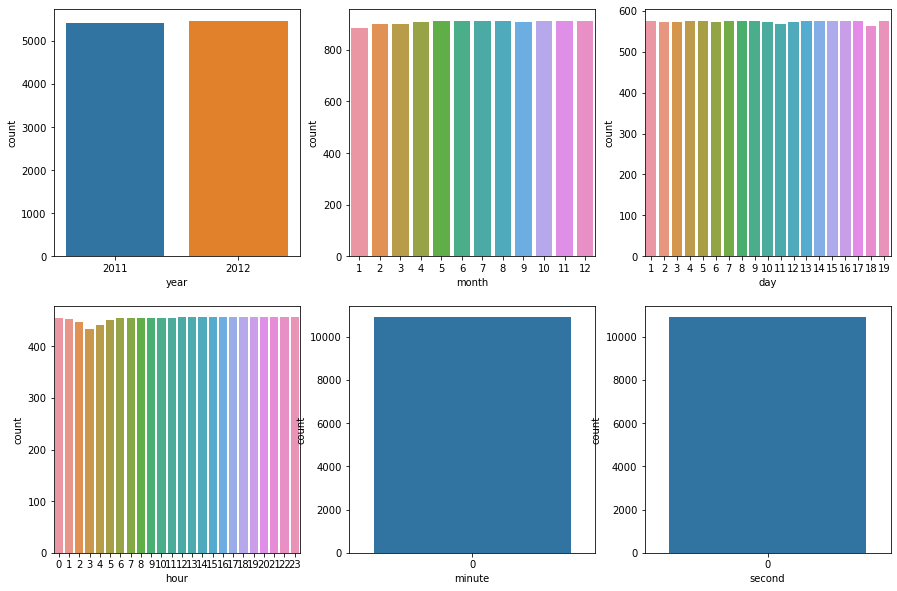

In [35]:
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(2,3,1)
sns.countplot(x = 'year', data = t_sep)

ax2 = fig.add_subplot(2,3,2)
sns.countplot(x = 'month', data = t_sep)

ax3 = fig.add_subplot(2,3,3)
sns.countplot(x = 'day', data = t_sep)

ax4 = fig.add_subplot(2,3,4)
sns.countplot(x = 'hour', data = t_sep)

ax5 = fig.add_subplot(2,3,5)
sns.countplot(x = 'minute', data = t_sep)

ax6 = fig.add_subplot(2,3,6)
sns.countplot(x = 'second', data = t_sep)

✅루브릭 평가 기준3 - 데이터 갯수 시각화 및 예측 결과 시각화

---

### 4. X, y 컬럼 선택 및 train/test 데이터 분리
- X(feature) 에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다 데이터 컬럼을 추가하거나 빼면서 잘 조합하여 데이터를 넣기 바랍니다. 만일 모든 데이터 컬럼(특징)을 넣는다면 오차 값이 말도 안 되게 적게 나올 수도 있습니다. ex) count를 예측하는데 casual,registered 컬럼이 필요할까요?

In [36]:
print(t_sep.shape)
t_sep.describe()#데이터의 형태를 확인

(10886, 18)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.0,10886.0
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495,9.992559,11.541613,0.0,0.0
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373,5.476608,6.915838,0.0,0.0
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000,0.0,0.0
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,5.000000,6.000000,0.0,0.0
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,7.000000,10.000000,12.000000,0.0,0.0
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,10.000000,15.000000,18.000000,0.0,0.0
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,12.000000,19.000000,23.000000,0.0,0.0


삭제 대상
- target과 그와 관련된 column → casual / registered / count
- datetime과 그에 파생된 컬럼이며 전부 값이 0인 → minute / second

In [37]:
drop_columns = ['datetime', 'minute', 'second', 'casual', 'registered', 'count']
                        # 버릴 컬럼
selected_columns = list(t_sep.drop(drop_columns, axis=1, inplace=False).columns)
                        # 버릴 컬럼을 제외한 채택 할 컬럼
print(drop_columns)
print(selected_columns)

['datetime', 'minute', 'second', 'casual', 'registered', 'count']
['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour']


In [38]:
X = t_sep.drop(drop_columns, axis=1, inplace=False).values
y = t_sep[['count']].values

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=32)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8708, 12) (8708, 1)
(2178, 12) (2178, 1)


---

### 5. LinearRegression 모델 학습
- sklearn의 LinearRegression 모델 불러오기 및 학습하기

In [40]:
# 모델 불러오기 및 학습하기
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

---

### 6. 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
- 학습된 모델에 X_test를 입력해서 예측값 출력하기
- 모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기
- mse 값과 함께 rmse 값도 계산하기

In [41]:
predictions = model.predict(X_test) #학습된 X의 예측값 출력
predictions

array([[ 95.38067265],
       [195.63859006],
       [ 53.70662422],
       ...,
       [213.8845699 ],
       [234.90060754],
       [348.76799676]])

In [42]:
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
                    #rmse = mse**0.5

print('mse =', mse); print('rmse =', rmse)

mse = 19588.85191112347
rmse = 139.96017973382098


✅루브릭 평가 기준2 - RMSE 값 150 이하 달성

In [43]:
X_test_df = pd.DataFrame(X_test, columns = selected_columns)
X_test_df['predictions'] = predictions
X_test_df['y_test'] = y_test
X_test_df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,predictions,y_test
0,1.0,0.0,1.0,1.0,9.02,9.850,29.0,30.0026,2011.0,2.0,15.0,9.0,95.380673,110
1,1.0,0.0,1.0,1.0,16.40,20.455,35.0,7.0015,2011.0,3.0,14.0,16.0,195.638590,107
2,3.0,0.0,1.0,1.0,24.60,27.275,88.0,7.0015,2011.0,9.0,13.0,0.0,53.706624,26
3,1.0,0.0,0.0,1.0,16.40,20.455,50.0,22.0028,2011.0,3.0,19.0,7.0,106.430887,13
4,3.0,0.0,0.0,2.0,25.42,29.545,78.0,11.0014,2012.0,8.0,19.0,22.0,327.214274,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,2.0,0.0,0.0,1.0,28.70,32.575,58.0,7.0015,2011.0,6.0,5.0,18.0,261.071864,363
2174,2.0,0.0,1.0,3.0,20.50,24.240,82.0,19.9995,2011.0,5.0,19.0,22.0,181.737700,79
2175,3.0,1.0,0.0,2.0,27.88,31.820,79.0,19.0012,2011.0,9.0,5.0,16.0,213.884570,284
2176,2.0,0.0,1.0,2.0,31.16,34.850,52.0,16.9979,2011.0,6.0,7.0,11.0,234.900608,151


---

### 7. x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
- x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기
- x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기

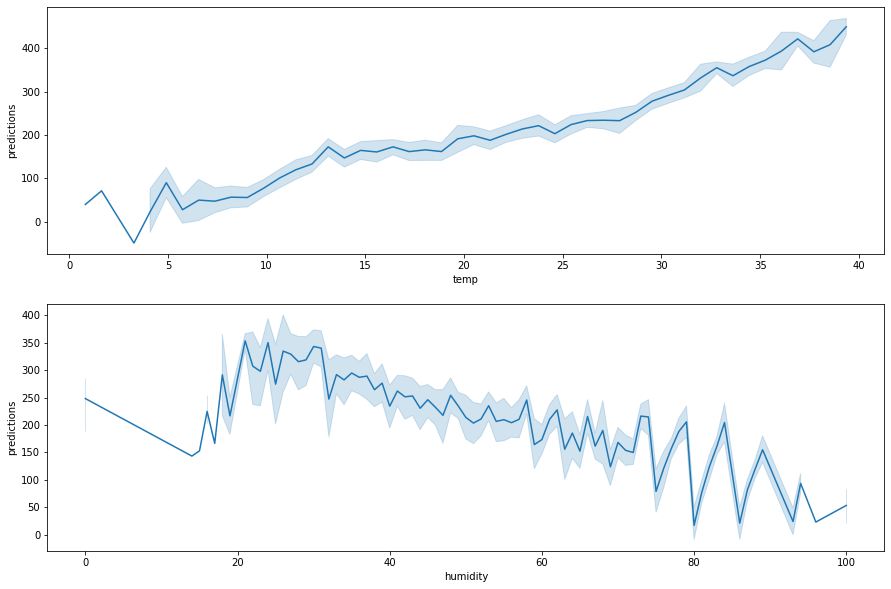

In [44]:
figure, ((ax1), (ax2)) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(15, 10)

sns.lineplot(data=X_test_df, x="temp", y="predictions", ax=ax1)
sns.lineplot(data=X_test_df, x="humidity", y="predictions", ax=ax2)

plt.show()

✅루브릭 평가 기준3 - 데이터 갯수 시각화 및 예측 결과 시각화

---

---

## Discussion
- Project1은 가중치W와 편향b를 이용한 회귀모델의 첫 사용이었다. LMS를 통해 눈으로 보고 따라가던 것과 직접 코드를 찾아 입력하며 프로젝트 목표를 따라가는 것이 상당히 힘들 일이었지만, 그만큼 손실함수나 기울기함수와 같은 어렵던 수학적 개념들을 이해하는 것에 더 가까워질 수 있었다. 본 프로젝트에서는 학습률을 높임으로써 loss값이 줄어드는 것이 관찰되었는데, 학습하는 내용에 따라 적정값이 있을 것 같다는 생각이 들었다. 이러한 부분에 대해 추가적인 조사를 못한 점이 아쉽다는 생각이 든다.
- 지난 Exploration과는 다르게 이번에는 local 환경에서 jupyter notebook을 사용했는데, 모든 환경이 구성되어있는 colab이나 aiffel jupyter와는 다르게 환경 설정을 처음부터 해야했기에 막히는 부분이 많았다. Project2에서 외부에서 csv 파일을 가져와서 사용 할 필요가 있었는데, 이부분 역시 local에서 진행하는 것이 어려웠지만 실제 필드에서 데이터 분석을 경험하는 것 같아서 신선했다!
- 모든 사람들에게 똑같이 주어지는 data 일지라도, 그 안에서 사용할 data를 고르고 정리하는 것이 결과를 얻는 것에 영향을 주며, 이러한 작업들이 데이터 분석에 있어서 중요하다는 것을 알 수 있었던 project들이었다.